In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [50]:
def log_2_formatter(x, pos):
    return '$2^{{{}}}$'.format(int(x))

def percent_formatter(x, pos):
    return '{}%'.format(int(x*100))

def log_10_formatter(x, pos):
    return '$10^{{{}}}$'.format(int(x))

## Real-world Applications

In [6]:
times_slashdot = {
    "EdgeExist": {"privGraph": 11525.5/1024, "edgelist": 346.651}, 
    "NeighborsCount": {"privGraph": 1445.42/32, "edgelist": 407.936},
    "NeighborsGet": {"privGraph": 4047.39/32, "edgelist": 674.55},
    "CycleIdentify": {"privGraph": 73.59, "edgelist": 1945.89},
    # "2hopNeighbors": {"privGraph": 1039.9, "edgelist": 5843.86},
    "Statistic": {"privGraph": 83.358, "edgelist": 638.818}, 
}

times_dblp = {
    "EdgeExist": {"privGraph": 32460/1024, "edgelist": 192.302}, 
    "NeighborsCount": {"privGraph": 4341.3/32, "edgelist": 236.572},
    "NeighborsGet": {"privGraph": 1965.22/32, "edgelist": 319.77},
    "CycleIdentify": {"privGraph": 213.38, "edgelist": 1006.48},
    # "2hopNeighbors": {"privGraph": 960.269, "edgelist": 2159.76},
    "Statistic": {"privGraph": 106.959, "edgelist": 375.59}, 
}

times_twitter = {
    "EdgeExist": {"privGraph": 359.058, "edgelist": 795550}, 
    "NeighborsCount": {"privGraph": 19457.8, "edgelist": 906564},
    "NeighborsGet": {"privGraph": 89211.6, "edgelist": 1.77331e+06},
    "CycleIdentify": {"privGraph": 1873.44, "edgelist": 4.7352e+06},
    # "2hopNeighbors": {"privGraph": 484975, "edgelist": 1.11665e+07},
    "Statistic": {"privGraph": 29411.9, "edgelist": 1.25181e+06}, 
}

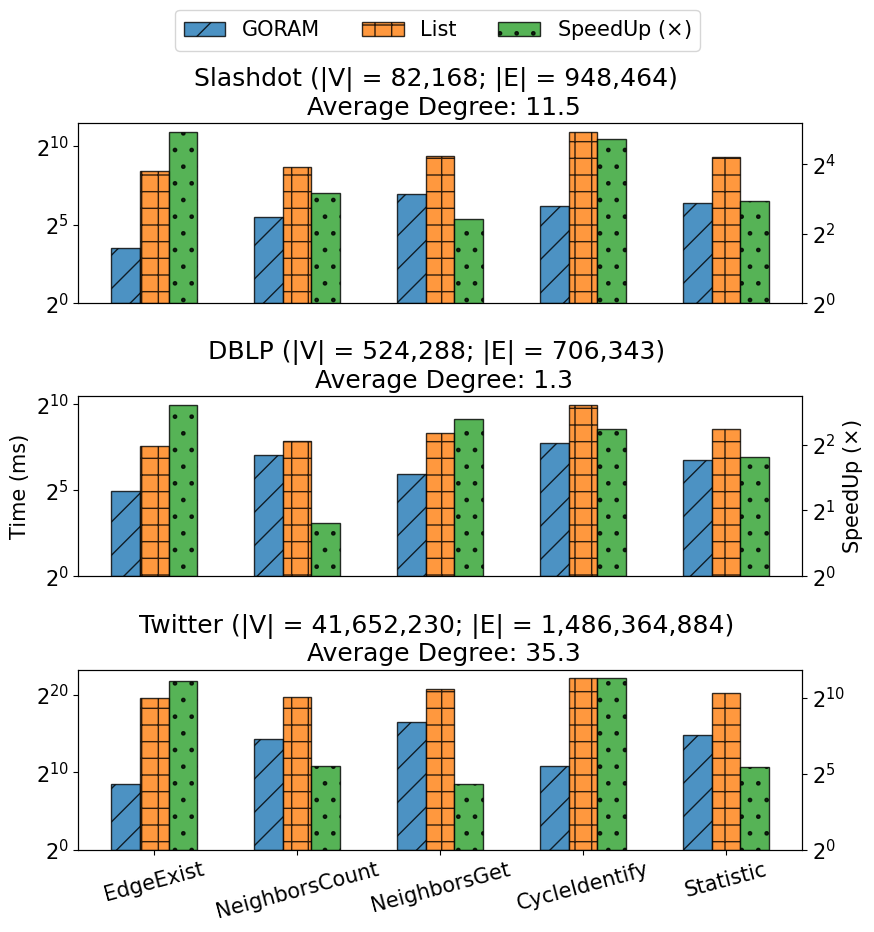

In [7]:
from matplotlib.ticker import FuncFormatter

title_dict = {
    "slashdot": "Slashdot (|V| = 82,168; |E| = 948,464) \n Average Degree: 11.5",
    "dblp": "DBLP (|V| = 524,288; |E| = 706,343) \n Average Degree: 1.3",
    "twitter": "Twitter (|V| = 41,652,230; |E| = 1,486,364,884) \n Average Degree: 35.3"
}

plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

target_dicts = ["slashdot", "dblp", "twitter"]
hatch_list = ["/", "+", "."]
color_list = plt.cm.tab10([0, 1, 2])

# for target in target_dicts:
for i in range(len(target_dicts)):
    target = target_dicts[i]
    ax = axs[i]
    ax2 = ax.twinx()
    t_dict = eval("times_" + target)

    operations = list(t_dict.keys())
    privGraph_times = np.array([t_dict[op]["privGraph"] for op in t_dict])
    edgelist_times = np.array([t_dict[op]["edgelist"] for op in t_dict])

    x = np.arange(len(operations))
    width = 0.2

    if(i == 0):
        ax.bar(x - width, np.log2(privGraph_times), width, label='GORAM', edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, label='List', edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, np.log2(edgelist_times / privGraph_times), width, label='SpeedUp ($\\times$)', edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    else:
        ax.bar(x - width, np.log2(privGraph_times), width, edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, np.log2(edgelist_times / privGraph_times), width, edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    
    if(i == 1):
        ax.set_ylabel('Time (ms)', fontsize=15)
        ax2.set_ylabel('SpeedUp ($\\times$)', fontsize=15)
    
    log2formatter = FuncFormatter(log_2_formatter)
    ax.set_title(title_dict[target])
    ax.yaxis.set_major_formatter(log2formatter)
    ax2.yaxis.set_major_formatter(log2formatter)
    
    # ax.set_xticks(rotation=45)
    if(i == 2):
        ax.set_xticks(x)
        ax.set_xticklabels(operations, rotation=15)
    else:
        ax.set_xticks([])

    
# plt.legend()
fig.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=3)
plt.tight_layout()
# plt.show()

plt.savefig("./graph/real_world.pdf", bbox_inches='tight', dpi=300)
    

In [8]:
# for target in target_dicts:
query_dict = {op: [] for op in times_slashdot}
time_dict_privGraph = {op: [] for op in times_slashdot}
time_dict_edgelist = {op: [] for op in times_slashdot}

for i in range(len(target_dicts)):
    target = target_dicts[i]
    t_dict = eval("times_" + target)
    
    privGraph_times = np.array([t_dict[op]["privGraph"] for op in t_dict])
    edgelist_times = np.array([t_dict[op]["edgelist"] for op in t_dict])
    speedup = edgelist_times / privGraph_times
    
    for op in t_dict:
        print(target, op, t_dict[op]["privGraph"])
        query_dict[op].append(t_dict[op]["edgelist"] / t_dict[op]["privGraph"])
        time_dict_privGraph[op].append(t_dict[op]["privGraph"])
        time_dict_edgelist[op].append(t_dict[op]["edgelist"])
        
    argmax = np.argmax(privGraph_times)
    print(target, list(t_dict.keys())[argmax], privGraph_times[argmax])
    argmin = np.argmin(privGraph_times)
    print(target, list(t_dict.keys())[argmin], privGraph_times[argmin])

slashdot EdgeExist 11.25537109375
slashdot NeighborsCount 45.169375
slashdot NeighborsGet 126.4809375
slashdot CycleIdentify 73.59
slashdot Statistic 83.358
slashdot NeighborsGet 126.4809375
slashdot EdgeExist 11.25537109375
dblp EdgeExist 31.69921875
dblp NeighborsCount 135.665625
dblp NeighborsGet 61.413125
dblp CycleIdentify 213.38
dblp Statistic 106.959
dblp CycleIdentify 213.38
dblp EdgeExist 31.69921875
twitter EdgeExist 359.058
twitter NeighborsCount 19457.8
twitter NeighborsGet 89211.6
twitter CycleIdentify 1873.44
twitter Statistic 29411.9
twitter NeighborsGet 89211.6
twitter EdgeExist 359.058


In [9]:
query_dict

{'EdgeExist': [30.798717973189884, 6.066458656808379, 2215.658751510898],
 'NeighborsCount': [9.031251816081138, 1.7437873448045516, 46.59128986833044],
 'NeighborsGet': [5.33321473838696, 5.206867424512268, 19.87757197494496],
 'CycleIdentify': [26.44231553200163, 4.716843190552067, 2527.542915705867],
 'Statistic': [7.663547589913385, 3.5115324563617833, 42.5613442178166]}

In [10]:
basic_queries = ["EdgeExist", "NeighborsCount", "NeighborsGet"]
basic_query_speedups = np.array([query_dict[op] for op in basic_queries])
basic_query_time_privGraph = np.array([time_dict_privGraph[op] for op in basic_queries])
basic_query_time_edgelist = np.array([time_dict_edgelist[op] for op in basic_queries])

complex_queries = ["CycleIdentify", "Statistic"]
complex_query_speedups = np.array([query_dict[op] for op in complex_queries])
complex_query_time_privGraph = np.array([time_dict_privGraph[op] for op in complex_queries])
complex_query_time_edgelist = np.array([time_dict_edgelist[op] for op in complex_queries])

## Parallelization and Scalability

In [11]:
times_twitter_parallel = {
    "EdgeExist": {"privGraph": [359.058, 210.613, 124.793, 85.31, 58.144], "edgelist": [795550, 376407, 177360, 88427, 49790.8]}, 
    # "CycleIdentify": {"privGraph": [1873.44, 1062.38, 545.02, 373.513, 215.637], "edgelist": [4.7352e+06, 2.30051e+06, 1.09369e+06, 516636, 311727]},
    "NeighborsCount": {"privGraph": [19457.8, 14312.5, 7637.87, 4053.82, 2974.59], "edgelist": [906564, 439345, 204260, 104929, 67169.5]},
    # "CycleIdentify": {"privGraph": [1873.44, 1062.38, 545.02, 373.513, 215.637], "edgelist": [4.7352e+06, 2.30051e+06, 1.09369e+06, 516636, 311727]},
    # "Statistic": {"privGraph": [29411.9, 18216.4, 10389.9, 5296.15, 3810.67], "edgelist": [1.25181e+06, 573396, 287015, 139825, 79175.1]}, 
    "NeighborsGet": {"privGraph": [89211.6, 59913.2, 44230.7, 36772.6, 35651.6], "edgelist": [1.77331e+06, 1.40266e+06, 1.03709e+06, 868674, 791752]},
    "CycleIdentify": {"privGraph": [1873.44, 1062.38, 545.02, 373.513, 215.637], "edgelist": [4.7352e+06, 2.30051e+06, 1.09369e+06, 516636, 311727]},
    "Statistic": {"privGraph": [29411.9, 18216.4, 10389.9, 5296.15, 3810.67], "edgelist": [1.25181e+06, 573396, 287015, 139825, 79175.1]}, 
    # "2hopNeighbors": {"privGraph": [484975, 347226, 262480, 224321, 216838], "edgelist": [1.11665e+07, 8.32523e+06, 6.48938e+06, 5.70601e+06, 5.44008e+06]},
}

target_parallels = [1, 2, 4, 8, 16]



max speedup =  EdgeExist 6.175323335167859 15.97785132996457
max speedup =  NeighborsCount 6.541338470175721 13.496661431155509
max speedup =  NeighborsGet 2.5023168665641937 2.2397291070941407
max speedup =  CycleIdentify 8.687933888896618 15.190214514623372
max speedup =  Statistic 7.718301506034372 15.810652591534458


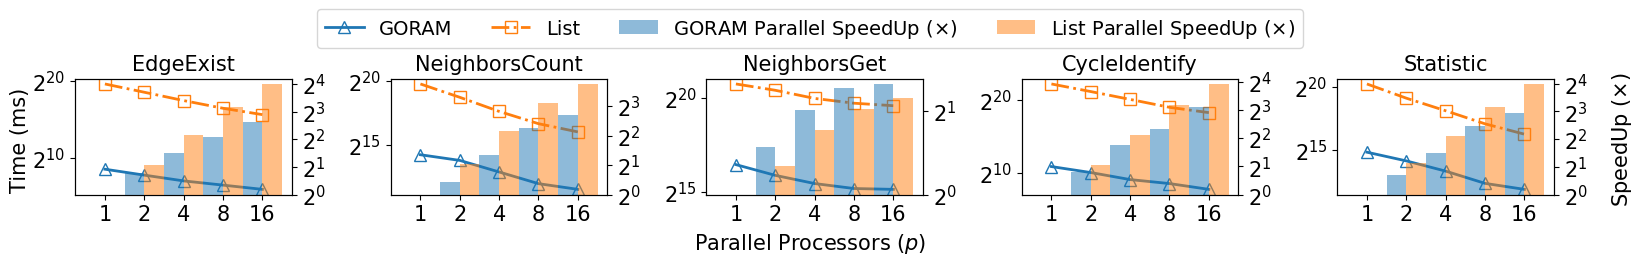

In [12]:
import matplotlib.ticker as ticker

plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(1, 5, figsize=(16, 2.15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)


cmap = plt.get_cmap("tab10")


for i in range(len(times_twitter_parallel)):
    target_query = times_twitter_parallel[list(times_twitter_parallel.keys())[i]]

    # j, k = i // 2, i % 2
    # ax = axs[j][k]
    ax = axs[i]
    ax2 = ax.twinx()
    ours_time = target_query["privGraph"]
    elist_time = target_query["edgelist"]
    speed_up_ours = np.array(ours_time[0]) / np.array(ours_time)
    speed_up_elist = np.array(elist_time[0]) / np.array(elist_time)
    
    if(i == 0):    
        # ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', label='MasterPieces', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8)
        # ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', label='List', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8)
        ax2.bar(np.log2(target_parallels)-0.25, np.log2(speed_up_ours), width=0.5, label='GORAM Parallel SpeedUp ($\\times$)', color=cmap(0), alpha=0.5)
        ax2.bar(np.log2(target_parallels)+0.25, np.log2(speed_up_elist), width=0.5,  label='List Parallel SpeedUp ($\\times$)', color=cmap(1), alpha=0.5)
        ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', label='GORAM', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
        ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', label='List', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8, linewidth=2)
    else:
        # ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8)
        # ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8)
        ax2.bar(np.log2(target_parallels)-0.25, np.log2(speed_up_ours), width=0.5,  color=cmap(0), alpha=0.5)
        ax2.bar(np.log2(target_parallels)+0.25, np.log2(speed_up_elist), width=0.5,  color=cmap(1), alpha=0.5)
        ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
        ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8, linewidth=2)
    
    print("max speedup = ", list(times_twitter_parallel.keys())[i], np.max(speed_up_ours), np.max(speed_up_elist))
    ax.set_title(list(times_twitter_parallel.keys())[i], fontsize=15)
    
    log2formatter = FuncFormatter(log_2_formatter)
    ax.yaxis.set_major_formatter(log2formatter)
    ax2.yaxis.set_major_formatter(log2formatter)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax.xaxis.set_major_formatter(log_2_formatter)
    ax.set_xticks(np.log2(target_parallels))
    ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0)


plt.tight_layout()  
fig.text(0, 0.5, 'Time (ms)', va='center', rotation='vertical', fontsize=15)
fig.text(1, 0.5, 'SpeedUp ($\\times$)', va='center', rotation='vertical', fontsize=15)
fig.text(0.5, -0.01, 'Parallel Processors ($p$)', ha='center', fontsize=15)

fig.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4, fontsize=14)
plt.savefig("./graph/real_world_parallel.pdf", bbox_inches='tight', dpi=300)
    
    

In [13]:
speedups_dict = {op: np.array(times_twitter_parallel[op]["edgelist"]) / np.array(times_twitter_parallel[op]["privGraph"]) for op in times_twitter_parallel}

In [14]:
speedups_dict

{'EdgeExist': array([2215.65875151, 1787.19737148, 1421.23356278, 1036.53733443,
         856.3359934 ]),
 'NeighborsCount': array([46.59128987, 30.69659389, 26.74305795, 25.88398104, 22.58109521]),
 'NeighborsGet': array([19.87757197, 23.41153535, 23.44728887, 23.6228605 , 22.20803554]),
 'CycleIdentify': array([2527.54291571, 2165.43044862, 2006.69700194, 1383.18077282,
        1445.60998344]),
 'Statistic': array([42.56134422, 31.47691092, 27.62442372, 26.40125374, 20.77721241])}

In [15]:
speedups_mat = np.array([speedups_dict[op] for op in speedups_dict])
speedups_mat.mean()

690.3731436529677

## Offline construction

In [16]:
time_construction_parallel = {
    "VORAM": [1.63385e+06, 829676, 422090, 243837, 174092],
    "EORAM": [1.31137e+06, 678437, 353513, 211524, 153643],
}

target_parallels = [1, 2, 4, 8, 16]

VORAM Speedups =  [1.         1.9692627  3.87085693 6.70058277 9.38498036]
EORAM Speedups =  [1.         1.93292819 3.70953826 6.19962747 8.5351757 ]


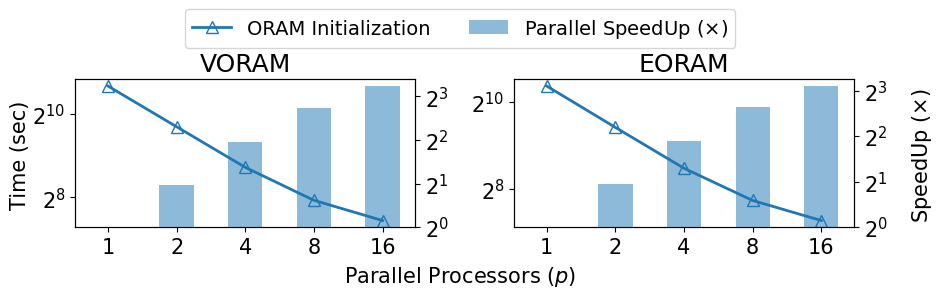

In [18]:
import matplotlib.ticker as ticker

plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(1, 2, figsize=(9, 2.5))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax = axs[0]
ax2 = ax.twinx()
target_query = np.array(time_construction_parallel["VORAM"]) / 1000
speedups = np.array(target_query[0]) / np.array(target_query)
print("VORAM Speedups = ", speedups)
ax2.bar(np.log2(target_parallels), np.log2(speedups), width=0.5, label='Parallel SpeedUp ($\\times$)', color=cmap(0), alpha=0.5)
ax.plot(np.log2(target_parallels), np.log2(target_query), marker='^', label='ORAM Initialization', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
# ax.bar([], [], label='Parallel SpeedUp ($\\times$)')

log2formatter = FuncFormatter(log_2_formatter)
ax.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.xaxis.set_major_formatter(log_2_formatter)
ax.set_xticks(np.log2(target_parallels))
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0)
ax.set_title("VORAM")
# ax.legend()
# ax2.legend()

ax = axs[1]
ax2 = ax.twinx()
target_query = np.array(time_construction_parallel["EORAM"]) / 1000
speedups = np.array(target_query[0]) / np.array(target_query)
print("EORAM Speedups = ", speedups)
ax2.bar(np.log2(target_parallels), np.log2(speedups), width=0.5,  color=cmap(0), alpha=0.5)
ax.plot(np.log2(target_parallels), np.log2(target_query), marker='^',  color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)

log2formatter = FuncFormatter(log_2_formatter)
ax.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.xaxis.set_major_formatter(log_2_formatter)
ax.set_xticks(np.log2(target_parallels))
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0)
ax.set_title("EORAM")
# ax.legend()
# ax2.legend()

plt.tight_layout()
fig.text(0, 0.5, 'Time (sec)', va='center', rotation='vertical', fontsize=15)
fig.text(1, 0.5, 'SpeedUp ($\\times$)', va='center', rotation='vertical', fontsize=15)
fig.text(0.5, -0.01, 'Parallel Processors ($p$)', ha='center', fontsize=15)
# fig.legend()
fig.legend(bbox_to_anchor=(0.5, 1.12), loc='upper center', ncol=2, fontsize=14)
plt.savefig("./graph/real_world_parallel_offline.pdf", bbox_inches='tight', dpi=300)



## Communications

In [19]:
comm_slashdot = {
    "EdgeExist": {"privGraph": 1.18339, "edgelist": 45.5642}, 
    "NeighborsCount": {"privGraph": 17.154, "edgelist": 67.5789},
    "NeighborsGet": {"privGraph": 24.9108, "edgelist": 120.692},
    "CycleIdentify": {"privGraph": 7.10035, "edgelist": 273.385},
    # "2hopNeighbors": {"privGraph": 203.984, "edgelist": 988.301},
    "Statistic": {"privGraph": 21.9263, "edgelist": 90.6985}, 
}

comm_dblp = {
    "EdgeExist": {"privGraph": 8.56864, "edgelist": 34.0333}, 
    "NeighborsCount": {"privGraph": 31.1645, "edgelist": 50.3279},
    "NeighborsGet": {"privGraph": 45.2573, "edgelist": 89.8824},
    "CycleIdentify": {"privGraph": 51.4118, "edgelist": 204.2},
    # "2hopNeighbors": {"privGraph": 234.822, "edgelist": 466.364},
    "Statistic": {"privGraph": 39.8342, "edgelist": 67.5458}, 
}

comm_twitter = {
    "EdgeExist": {"privGraph": 52.2794, "edgelist": 70484.6}, 
    "NeighborsCount": {"privGraph": 6026.63, "edgelist": 104621},
    "NeighborsGet": {"privGraph": 8751.93, "edgelist": 251274},
    "CycleIdentify": {"privGraph": 313.676, "edgelist": 422907},
    # "2hopNeighbors": {"privGraph": 54162.2, "edgelist": 1.15634e+06},
    "Statistic": {"privGraph": 7703.08, "edgelist": 140412}, 
}

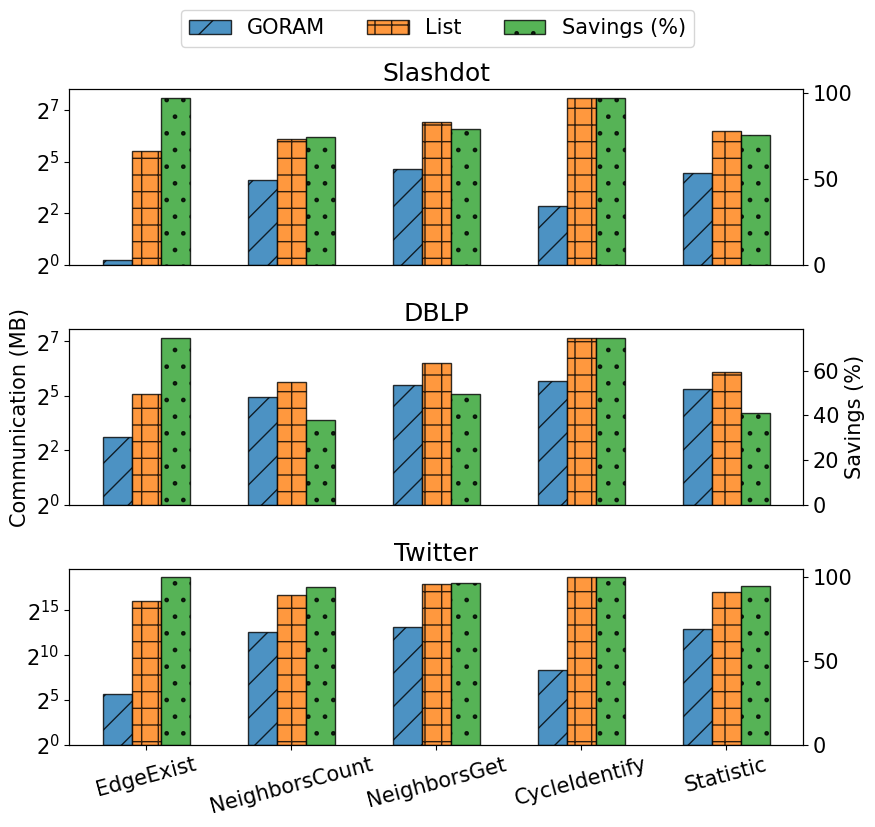

In [20]:
plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(3, 1, figsize=(9, 8))

target_dicts = ["slashdot", "dblp", "twitter"]
hatch_list = ["/", "+", "."]
color_list = plt.cm.tab10([0, 1, 2])

# for target in target_dicts:
for i in range(len(target_dicts)):
    target = target_dicts[i]
    ax = axs[i]
    ax2 = ax.twinx()
    t_dict = eval("comm_" + target)

    operations = list(t_dict.keys())
    privGraph_times = np.array([t_dict[op]["privGraph"] for op in t_dict])
    edgelist_times = np.array([t_dict[op]["edgelist"] for op in t_dict])

    x = np.arange(len(operations))
    width = 0.2

    if(i == 0):
        ax.bar(x - width, np.log2(privGraph_times), width, label='GORAM', edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, label='List', edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, ((edgelist_times - privGraph_times) / edgelist_times)*100, width, label='Savings (%)', edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    else:
        ax.bar(x - width, np.log2(privGraph_times), width, edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, ((edgelist_times - privGraph_times) / edgelist_times)*100, width, edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    
    if(i == 1):
        ax.set_ylabel('Communication (MB)', fontsize=15)
        ax2.set_ylabel('Savings (%)', fontsize=15)
    
    log2formatter = FuncFormatter(log_2_formatter)
    # ax.set_title(title_dict[target])
    title = target
    if(target == "slashdot"):
        title = "Slashdot"
    elif(target == "dblp"):
        title = "DBLP"
    elif(target == "twitter"):
        title = "Twitter"
    ax.set_title(title)
    ax.yaxis.set_major_formatter(log2formatter)
    # ax2.yaxis.set_major_formatter(log2formatter)
    
    # ax.set_xticks(rotation=45)
    if(i == 2):
        ax.set_xticks(x)
        ax.set_xticklabels(operations, rotation=15)
    else:
        ax.set_xticks([])

    
# plt.legend()
fig.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=3)
plt.tight_layout()
# plt.show()
plt.savefig("./graph/real_world_communications.pdf", bbox_inches='tight', dpi=300)


In [21]:
saving_dict_twitter = {op: ((comm_twitter[op]["edgelist"] - comm_twitter[op]["privGraph"]) / comm_twitter[op]["edgelist"])*100 for op in comm_twitter}
saving_dict_dblp = {op: ((comm_dblp[op]["edgelist"] - comm_dblp[op]["privGraph"]) / comm_dblp[op]["edgelist"])*100 for op in comm_dblp}
saving_dict_slashdot = {op: ((comm_slashdot[op]["edgelist"] - comm_slashdot[op]["privGraph"]) / comm_slashdot[op]["edgelist"])*100 for op in comm_slashdot}

In [22]:
# basic_queries = ["NeighborsCount", "NeighborsGet", "2hopNeighbors", "Statistic"]
basic_queries = ["NeighborsCount", "NeighborsGet", "Statistic"]
basic_query_savings_twitter = np.array([saving_dict_twitter[op] for op in basic_queries])
basic_query_savings_dblp = np.array([saving_dict_dblp[op] for op in basic_queries])
basic_query_savings_slashdot = np.array([saving_dict_slashdot[op] for op in basic_queries])

print(basic_query_savings_twitter.mean())
print(basic_query_savings_dblp.mean())
print(basic_query_savings_slashdot.mean())

all_mat = np.array([basic_query_savings_twitter, basic_query_savings_dblp, basic_query_savings_slashdot])
all_mat.mean()

95.09016069840897
42.91726458268448
76.60047666070115


71.53596731393154

## Permutation network

In [23]:
size_list = [1<<10, 1<<12, 1<<14, 1<<16, 1<<18, 1<<20]
time_dict = {
    "shuffMem": [12.396, 50.687, 137.898, 490.169, 2242.29, 9159.9],
    "permutation_net": [216.263, 1236.99, 4951.25, 32687.2, 174643, 765082]
}
comm_dict = {
    "shuffMem": [1.08138, 4.32541, 17.3015, 69.206, 276.825, 1107.3],
    "permutation_net": [42.4726, 207.623, 981.473, 4529.85, 20535.3, 91804.9]
}



SpeedUps =  [17.44619232 24.40448241 35.90516179 66.68557171 77.88600047 83.52514765]
Savings =  [0.97453935 0.979167   0.9823719  0.98472223 0.98651955 0.98793855]


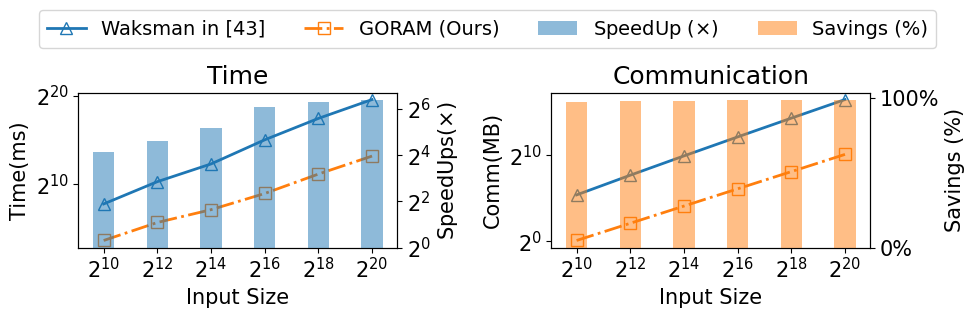

In [73]:
plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(1, 2, figsize=(10, 2.8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax = axs[0]
ax2 = ax.twinx()

speedups = np.array(time_dict["permutation_net"]) / np.array(time_dict["shuffMem"])
bars = ax2.bar(np.log2(size_list), np.log2(speedups), width=0.8, label='SpeedUp ($\\times$)', color=cmap(0), alpha=0.5)

# for bar in bars:
#     height = bar.get_height()
#     ax2.text(
#         bar.get_x() + bar.get_width() / 2,  # x 坐标
#         height,  # y 坐标
#         f'{int(2**int(height))}$\\times$',  # 标签文本
#         ha='center',  # 水平对齐方式
#         va='bottom'  # 垂直对齐方式
#     )

ax.plot(np.log2(size_list), np.log2(time_dict["permutation_net"]), marker='^', label='Waksman in [43]', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
ax.plot(np.log2(size_list), np.log2(time_dict["shuffMem"]), marker='s', label='GORAM (Ours)', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8, linewidth=2)

log2formatter = FuncFormatter(log_2_formatter)
ax.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xticks(np.log2(size_list))
ax.set_xticklabels([f"$2^{{{int(np.log2(size_list[i]))}}}$" for i in range(len(size_list))], rotation=0)

print("SpeedUps = ", speedups)
ax.set_ylabel("Time(ms)")
ax2.set_ylabel("SpeedUps($\\times$)")
ax.set_title("Time")
ax.set_xlabel("Input Size")


ax = axs[1]
ax2 = ax.twinx()
savings = 1 - np.array(comm_dict["shuffMem"]) / np.array(comm_dict["permutation_net"])
bars = ax2.bar(np.log2(size_list), savings, width=0.8,  color=cmap(1), alpha=0.5, label="Savings (%)")

# for bar in bars:
#     height = bar.get_height()
#     ax2.text(
#         bar.get_x() + bar.get_width() / 2,  # x 坐标
#         height,  # y 坐标
#         f'{(height)*100:.0f}$\%$',  # 标签文本
#         ha='center',  # 水平对齐方式
#         va='bottom'  # 垂直对齐方式
#     )

print("Savings = ", savings)
ax.plot(np.log2(size_list), np.log2(comm_dict["permutation_net"]), marker='^',  color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
ax.plot(np.log2(size_list), np.log2(comm_dict["shuffMem"]), marker='s',  color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8, linewidth=2)

log2formatter = FuncFormatter(log_2_formatter)
percenformatter = FuncFormatter(percent_formatter)
ax.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_formatter(percenformatter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticks(np.log2(size_list))
ax2.set_ylabel("Savings (%)")
ax.set_ylabel("Comm(MB)")
ax.set_title("Communication")
ax.set_xlabel("Input Size")
ax.set_xticklabels([f"$2^{{{int(np.log2(size_list[i]))}}}$" for i in range(len(size_list))], rotation=0)

plt.tight_layout()

# fig.text(0.5, -0.01, 'Sizes', ha='center', fontsize=15)
fig.subplots_adjust(top=0.85)
# fig.legend()
fig.legend(bbox_to_anchor=(0.5, 1.18), loc='upper center', ncol=4, fontsize=14)
plt.savefig("./graph/permutation.pdf", bbox_inches='tight', dpi=300)